In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# T

T = pd.read_csv("T.csv")
T

# FB

In [23]:
#FB = pd.read_csv("FB.txt", sep = "\t")
#FB = FB[FB.country=='CZE']
#FB.to_csv("FB_CZE.csv")
FB = pd.read_csv("FB_CZE.csv")
FB

,Unnamed: 0,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
0,1216539,2020-03-01,CZE,GADM,CZE.10_1,NaN,0.03969,0.27700,full_february,DAY_OF_WEEK
1,1216540,2020-03-02,CZE,GADM,CZE.10_1,NaN,0.04003,0.14216,full_february,DAY_OF_WEEK
2,1216541,2020-03-03,CZE,GADM,CZE.10_1,NaN,-0.03595,0.17218,full_february,DAY_OF_WEEK
3,1216542,2020-03-04,CZE,GADM,CZE.10_1,NaN,-0.01282,0.15398,full_february,DAY_OF_WEEK
4,1216543,2020-03-05,CZE,GADM,CZE.10_1,NaN,-0.00481,0.15201,full_february,DAY_OF_WEEK
...,...,...,...,...,...,...,...,...,...,...
3327,1219866,2020-10-20,CZE,GADM,CZE.9_1,Pardubický,-0.07176,0.19815,full_february,DAY_OF_WEEK
3328,1219867,2020-10-21,CZE,GADM,CZE.9_1,Pardubický,-0.04729,0.19177,full_february,DAY_OF_WEEK
3329,1219868,2020-10-22,CZE,GADM,CZE.9_1,Pardubický,-0.10316,0.20024,full_february,DAY_OF_WEEK
3330,1219869,2020-10-23,CZE,GADM,CZE.9_1,Pardubický,-0.15269,0.21023,full_february,DAY_OF_WEEK


In [10]:
FB.polygon_name.value_counts(dropna=False)

NaN                952
Prague             238
Olomouck-          181
-steck-            181
Zl-nsk-            181
Karlovarsk-        181
Moravskoslezsk-    181
Jihomoravsk-       181
Pardubick-         181
Kr-lov-hradeck-    181
Libereck-          181
Karlovarský         57
Ústecký             57
Zlínský             57
Královéhradecký     57
Pardubický          57
Liberecký           57
Jihomoravský        57
Olomoucký           57
Moravskoslezský     57
Name: polygon_name, dtype: int64

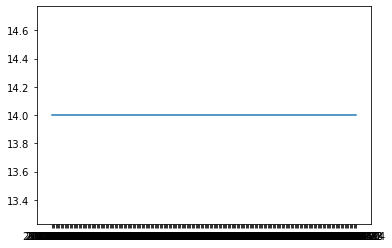

In [17]:
plt.plot(FB.ds.value_counts(dropna=False).sort_index())

In [18]:
FB[FB.ds == '2020-03-01']

,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
1216539,2020-03-01,CZE,GADM,CZE.10_1,NaN,0.03969,0.27700,full_february,DAY_OF_WEEK
1216777,2020-03-01,CZE,GADM,CZE.11_1,Prague,-0.01733,0.22402,full_february,DAY_OF_WEEK
1217015,2020-03-01,CZE,GADM,CZE.12_1,NaN,0.03599,0.28154,full_february,DAY_OF_WEEK
1217253,2020-03-01,CZE,GADM,CZE.13_1,-steck-,-0.00366,0.30383,full_february,DAY_OF_WEEK
1217491,2020-03-01,CZE,GADM,CZE.14_1,Zl-nsk-,-0.00640,0.28811,full_february,DAY_OF_WEEK
1217729,2020-03-01,CZE,GADM,CZE.1_1,NaN,-0.01667,0.26881,full_february,DAY_OF_WEEK
1217967,2020-03-01,CZE,GADM,CZE.2_1,Jihomoravsk-,-0.06704,0.28164,full_february,DAY_OF_WEEK
1218205,2020-03-01,CZE,GADM,CZE.3_1,Karlovarsk-,-0.01404,0.29128,full_february,DAY_OF_WEEK
1218443,2020-03-01,CZE,GADM,CZE.4_1,NaN,0.02422,0.27224,full_february,DAY_OF_WEEK
1218681,2020-03-01,CZE,GADM,CZE.5_1,Kr-lov-hradeck-,0.02852,0.26711,full_february,DAY_OF_WEEK


# GOOGLE

In [5]:
GO = pd.read_csv("GO.csv")
GO

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-15,13.0,8.0,37.0,14.0,3.0,-2
1,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-16,12.0,8.0,28.0,9.0,2.0,-1
2,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-17,4.0,2.0,17.0,1.0,-2.0,0
3,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-18,9.0,5.0,22.0,2.0,-2.0,0
4,CZ,Czechia,NaN,NaN,NaN,NaN,NaN,2020-02-19,4.0,1.0,6.0,-2.0,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-16,-42.0,1.0,-15.0,-35.0,-24.0,16
3731,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-17,-52.0,1.0,-9.0,-32.0,-11.0,10
3732,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-18,-44.0,-6.0,25.0,-26.0,-13.0,6
3733,CZ,Czechia,Zlín Region,NaN,NaN,CZ-ZL,NaN,2020-10-19,-31.0,-1.0,36.0,-27.0,-24.0,12


In [7]:
GO.sub_region_1.value_counts(dropna=False)

Moravian-Silesian Region    249
Hradec Králové Region       249
Pardubice Region            249
Vysočina Region             249
South Moravian Region       249
Plzeň Region                249
South Bohemian Region       249
Ústí nad Labem Region       249
Zlín Region                 249
Liberec Region              249
Olomouc Region              249
Central Bohemian Region     249
Prague                      249
Karlovy Vary Region         249
NaN                         249
Name: sub_region_1, dtype: int64

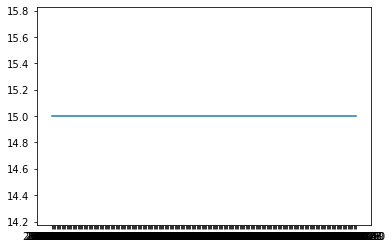

In [6]:
plt.plot(GO.date.value_counts(dropna=False).sort_index())